In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

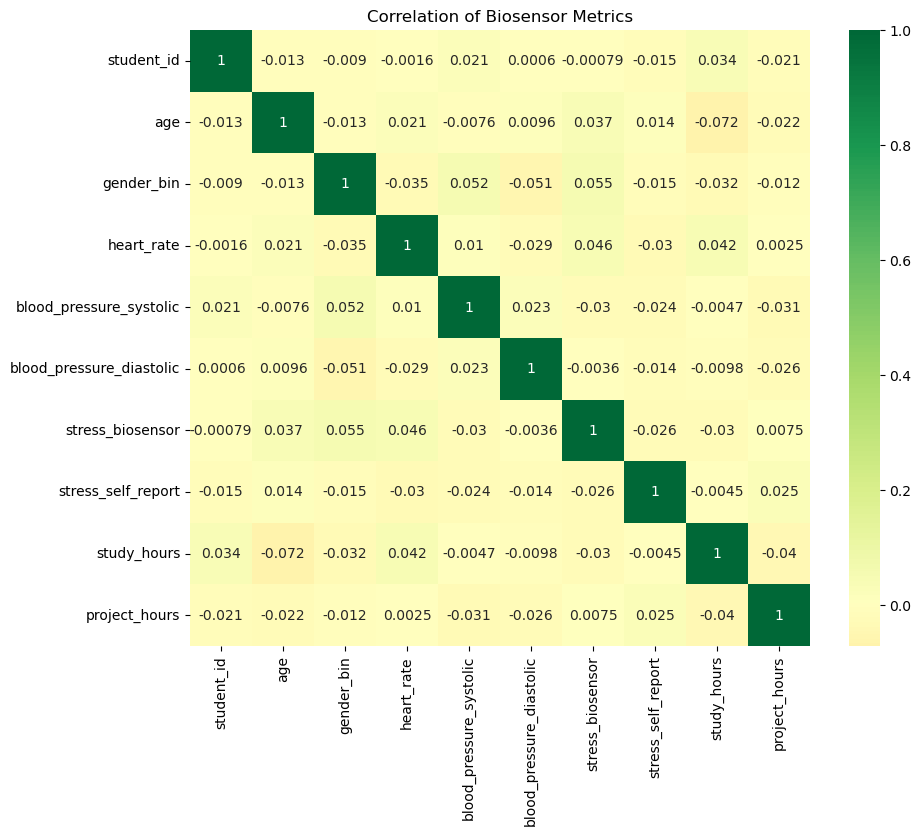

In [46]:
numeric_df = df_sim.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation of Biosensor Metrics')
plt.show

In [49]:
#Load the simulated data
df_sim = pd.read_csv('../data/student_health_data.csv')

Success!
Current Columns: ['student_id', 'age', 'gender_bin', 'heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'stress_biosensor', 'stress_self_report', 'physical_activity', 'sleep_quality', 'mood', 'study_hours', 'project_hours', 'health_risk_level', 'biosensor_label']


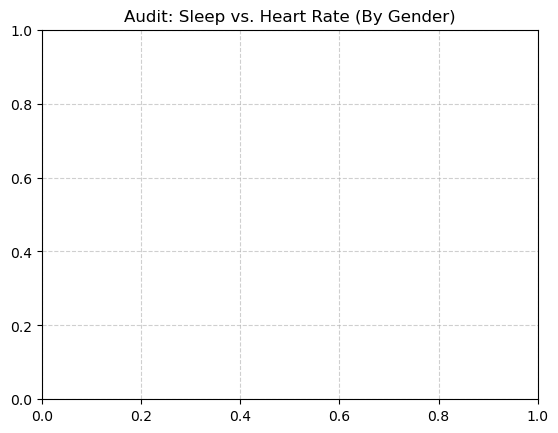

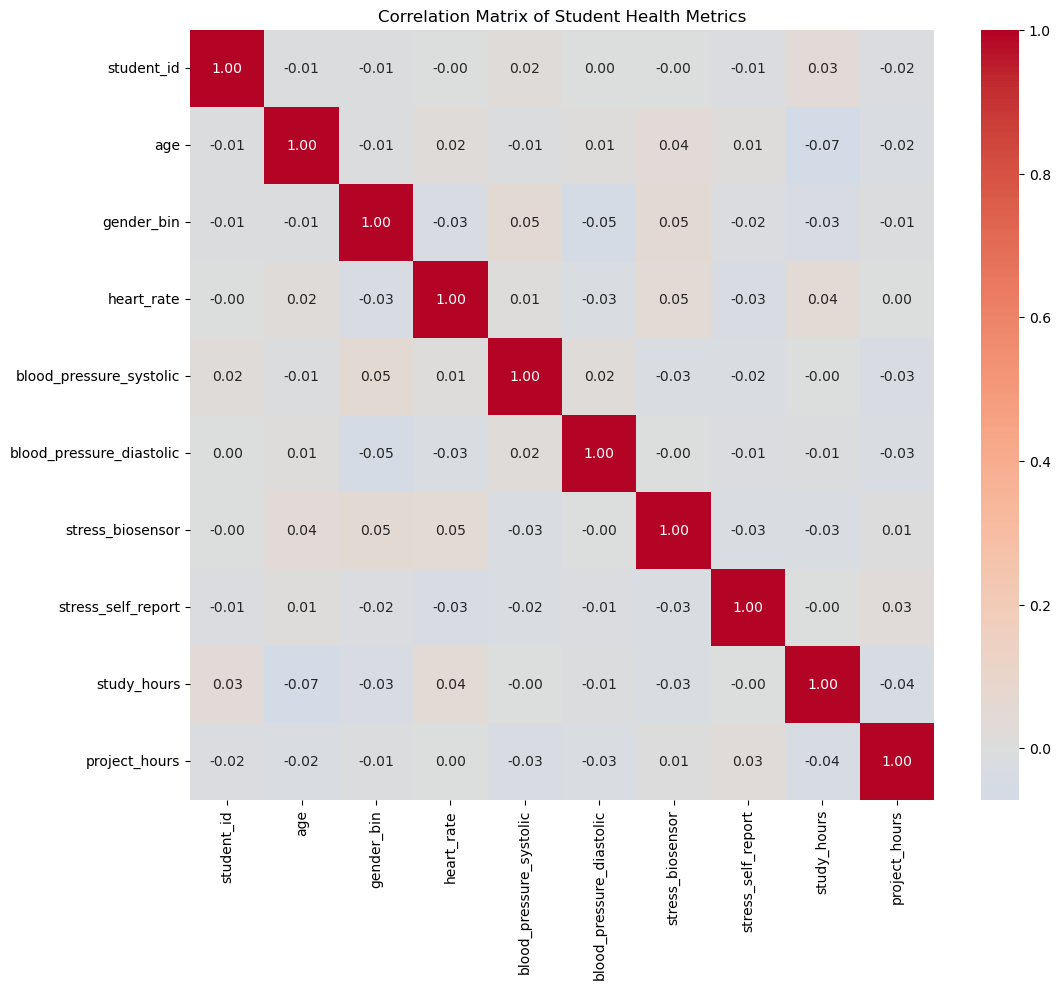

Error: Required columns not found.


In [81]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load the simulated data
df_sim = pd.read_csv('../data/student_health_data.csv')

#make all column text lower-cased.
df_sim.columns = [col.lower().replace(' ', '_') for col in df_sim.columns]

#Rename Logic (fixed dictionary syntax)
mapping = {
    'stress_level_biosensor': 'stress_biosensor',
    'stress_level_self_report': 'stress_self_report',
    'sleep_duration': 'sleep_hours',
    'hours_of_sleep': 'sleep_hours',
    'gender': 'gender_bin',
    'heart_rate': 'heart_rate'
}
df_sim.rename(columns=mapping, inplace=True)

#Mirror MIT: 0 = Male, 1 = Female
if 'gender_bin' in df_sim.columns:
    gender_map = {'Male': 0, 'Female': 1, 'M': 0, 'F': 1, 'male': 0, 'female':1}
    df_sim['gender_bin'] = df_sim['gender_bin'].map(gender_map).fillna(0).astype(int)

    #Create labels
def categorize_stress(score):
    try:
        score = float(score)
        if score >= 7: return 'High'
        elif score >= 4: return "Medium"
        else: return "Low"
    except:
        return "Low"
#Apply Mapping (verify column exists first)
if 'stress_biosensor' in df_sim.columns:
    df_sim['biosensor_label'] = df_sim['stress_biosensor'].apply(categorize_stress)
        
print ("Success!")
print (f"Current Columns: {df_sim.columns.tolist()}")

#Verify gender counts
df_sim['gender_bin'].value_counts()

#gender count returns nearly "perfect split"
import seaborn as sns
import matplotlib.pyplot as plt

#BIAS AUDIT: Sleep vs. Heart Rate
#Checking synthetic data for linear relationsips
if 'sleep_hours' in df_sim.columns and 'heart_rate' in df_sim.columns:
    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df_sim,
        x='sleep_hours',
        y='heart_rate',
        hue='gender_bin',
        palette='virdis',
        scatter_kws={'alpha':0.5}
)
plt.title('Audit: Sleep vs. Heart Rate (By Gender)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Correlation Heatmap
numeric_df = df_sim.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Student Health Metrics')
    plt.show()

#Calculate correlation 
if 'sleep_hours' in df_sim.columns and 'heart_rate' in df_sim.columns:
    correlation = df_sim[['sleep_hours', 'heart_rate']].corr().iloc[0,1]
    print(f"Success! Correlation between Sleep and HR: {correlation:.4f}")
    print("All systems go!")
else:
    print("Error: Required columns not found.")